In [1]:
import collect
from mnist_data import MnistData
from mnist_classifier import MnistClassifier

from cifar_data import Cifar10Data
from cifar_classifier import Cifar10Classifier

data_dispatch = {'mnist': MnistData, 'cifar10': Cifar10Data, 'cifar': Cifar10Data}
classifier_dispatch = {'mnist': MnistClassifier, 'cifar10': Cifar10Classifier, 'cifar': Cifar10Classifier}

/home/shared/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Load data 
#### (changable by dataset_name)

In [2]:
dataset_name = 'mnist'

features_data = data_dispatch[dataset_name](use_features=True)
raw_data = data_dispatch[dataset_name](use_features=False)

features, features_labels = features_data._features_and_labels()
images, raw_labels = raw_data._features_and_labels()

n_clusters = 30
data = collect.load_quadruplets(n_clusters, dataset_name=dataset_name)
quadruplets, cat_to_centroids, cat_to_vectors, original_shape = data

In [15]:
import numpy as np

from scipy.spatial.distance import cosine


def norm_measure(u, v):
    return np.linalg.norm(u - v)


def barplot_feature_centroids(ϕ, category, distance_measure=cosine):        
    centroids = cat_to_centroids[category]
    
    distances = np.array([distance_measure(ϕ, centroid) for centroid in centroids])
    return distances
#     argsort = np.argsort(distances)
#     return argsort, centroids


In [16]:
feature, label = features[0], features_labels[0]
distances = barplot_feature_centroids(feature, label)

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd


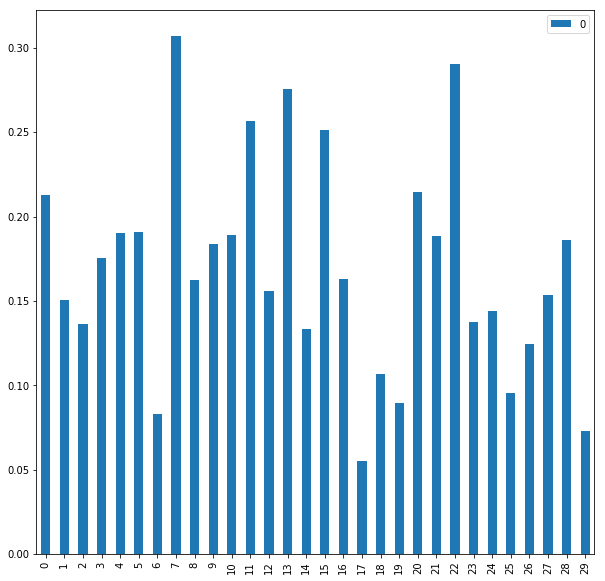

In [20]:
df = pd.DataFrame(distances)

df.plot(kind='bar', figsize=(10, 10))

plt.show()